In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import KFold
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [111]:
read_file = pd.read_csv ('housing.data.txt', header = None, delim_whitespace= True)
read_file.to_csv ('housing_data.csv', index=None)

In [112]:
housing = pd.read_csv('housing_data.csv')

In [113]:
X = housing.iloc[:, [0, 12]]
y = housing.iloc[:, 13]

In [114]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [115]:
bias = []
variance_total = []

In [116]:
mean_score = []
variance = []
best_svr = SVR(kernel='rbf')
for i in np.arange(1,100):
    scores = []
    cv = KFold(5, shuffle= True)
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        best_svr.fit(X_train, y_train)
        scores.append(best_svr.score(X_test, y_test))
    mean_score.append(np.mean(scores))
    variance.append(np.std(scores))
bias.append(np.mean(mean_score))
variance_total.append(np.std(variance))
print("50 Folds: Mean - " + str(np.mean(mean_score)) + " | Variance - " + str(np.std(variance)))

50 Folds: Mean - 0.5757919692524067 | Variance - 0.015795571237436613


In [117]:
mean_score = []
variance = []
best_svr = SVR(kernel='rbf')
for i in np.arange(1,100):
    scores = []
    cv = KFold(10, shuffle= True)
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        best_svr.fit(X_train, y_train)
        scores.append(best_svr.score(X_test, y_test))
    mean_score.append(np.mean(scores))
    variance.append(np.std(scores))
bias.append(np.mean(mean_score))
variance_total.append(np.std(variance))
print("50 Folds: Mean - " + str(np.mean(mean_score)) + " | Variance - " + str(np.std(variance)))

50 Folds: Mean - 0.5837544143067722 | Variance - 0.017280228900954188


In [118]:
mean_score = []
variance = []
best_svr = SVR(kernel='rbf')
for i in np.arange(1,100):
    scores = []
    cv = KFold(20, shuffle= True)
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        best_svr.fit(X_train, y_train)
        scores.append(best_svr.score(X_test, y_test))
    mean_score.append(np.mean(scores))
    variance.append(np.std(scores))
bias.append(np.mean(mean_score))
variance_total.append(np.std(variance))
print("50 Folds: Mean - " + str(np.mean(mean_score)) + " | Variance - " + str(np.std(variance)))

50 Folds: Mean - 0.5827062004494769 | Variance - 0.01598240009972824


In [119]:
mean_score = []
variance = []
best_svr = SVR(kernel='rbf')
for i in np.arange(1,100):
    scores = []
    cv = KFold(50, shuffle= True)
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        best_svr.fit(X_train, y_train)
        scores.append(best_svr.score(X_test, y_test))
    mean_score.append(np.mean(scores))
    variance.append(np.std(scores))
bias.append(np.mean(mean_score))
variance_total.append(np.std(variance))
print("50 Folds: Mean - " + str(np.mean(mean_score)) + " | Variance - " + str(np.std(variance)))

50 Folds: Mean - 0.5496511940752106 | Variance - 0.06057757606965267


In [120]:
mean_score = []
variance = []
best_svr = SVR(kernel='rbf')
for i in np.arange(1,100):
    scores = []
    cv = KFold(50, shuffle= True)
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        best_svr.fit(X_train, y_train)
        scores.append(best_svr.score(X_test, y_test))
    mean_score.append(np.mean(scores))
    variance.append(np.std(scores))
bias.append(np.mean(mean_score))
variance_total.append(np.std(variance))
print("50 Folds: Mean - " + str(np.mean(mean_score)) + " | Variance - " + str(np.std(variance)))

50 Folds: Mean - 0.5451087037714807 | Variance - 0.09422791643167801


In [121]:
k = [5, 10, 20, 50, 100]

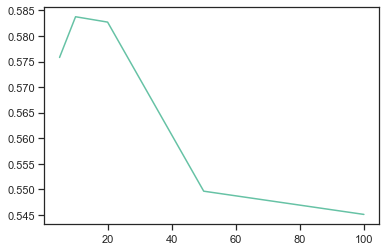

In [122]:
plt.plot(k, bias)

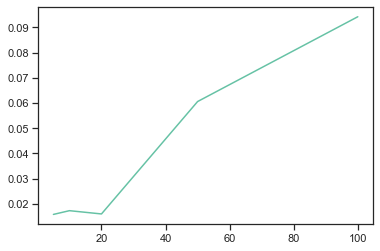

In [132]:
plt.plot(k, variance_total)

In [133]:
v = np.array(variance_total)

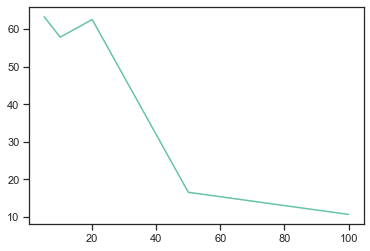

In [134]:
plt.plot(k, 1/v)

In [ ]:
# Looking at this simulation, it seems as though the claim that bias increases as variance decreases is true.
# However, in this graph, at a small K, our bias inccreases as we get larger rather than decreases.
# This is also true with our Variance. We can see that it decreases as we move from 10 to 20 folds before increasing.